In [62]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import datetime
from tqdm.notebook import tqdm

In [63]:
df = pd.read_csv('caso.csv')
df.sample(10)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
336011,2020-06-12,SP,Bady Bassitt,city,37,4,66,False,17502.0,3504602.0,211.40441,0.1081
370821,2020-05-26,SP,Santa Cruz da Esperança,city,2,0,20,False,2139.0,3546256.0,93.50164,0.0000
117273,2020-05-04,PA,Colares,city,3,1,15,False,12085.0,1502608.0,24.82416,0.3333
15863,2020-04-25,AM,Novo Airão,city,2,1,27,False,19454.0,1303205.0,10.28066,0.5000
99663,2020-05-24,MA,Pedreiras,city,127,5,33,False,39229.0,2108207.0,323.74009,0.0394
80563,2020-05-15,GO,Pirenópolis,city,0,0,31,False,24908.0,5217302.0,NaN,0.0000
284,2020-07-12,AP,Cutias,city,492,2,66,False,5983.0,1600212.0,8223.29935,0.0041
178630,2020-04-10,PB,Igaracy,city,1,0,19,False,6117.0,2502607.0,16.34788,0.0000
335406,2020-06-13,SP,Aspásia,city,2,0,12,False,1822.0,3503950.0,109.76948,0.0000
26602,2020-06-02,CE,Aratuba,city,26,0,30,False,11847.0,2301406.0,219.46484,0.0000


### Dados por estado

In [37]:
df_states = df[['date','state','city','confirmed','deaths']].loc[df['city'].isnull()].drop('city', axis=1)
df_states.sort_values(by='date', inplace=True)
df_states['date'] =  df_states['date'].apply(pd.to_datetime)

In [38]:
def get_region(state):
    if state in ['RS','SC','PR']:
        return 'Sul'
    elif state in ['SP','RJ','ES','MG']:
        return 'Sudeste'
    elif state in ['MT','MS','GO']:
        return 'Centro-Oeste'
    elif state in ['MA','PI','CE','RN','PE','PB','SE','AL','BA']:
        return 'Nordeste'
    elif state in ['AM','RR','AP','PA','TO','RO','AC']:
        return 'Norte'
    return 'Distrito Federal'

In [39]:
df_states['region'] = df_states['state'].apply(get_region)

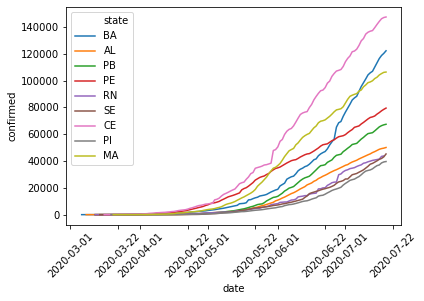

In [40]:
ax = sns.lineplot(x='date', y='confirmed', hue='state', data=df_states.loc[df_states['region']=='Nordeste'])
plt.xticks(rotation=45)
plt.show()

### Distribuição do inicio do surto

inicio = 5 casos confirmados ou 1 morte

In [74]:
df_cities = df.loc[df['place_type']=='city']
df_cities.insert(0, 'outbreak', np.NaN)
df_cities['date'] =  df_cities['date'].apply(pd.to_datetime)

for c in tqdm(df_cities['city'].unique()):
    df_cities.loc[df_cities['city']==c, 'outbreak'] = get_outbreak(c)

<ipython-input-74-02d92fbec7aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities['date'] =  df_cities['date'].apply(pd.to_datetime)
  0%|          | 0/5122 [00:00<?, ?it/s]/home/pedro/.local/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
100%|██████████| 5122/5122 [06:44<00:00, 12.67it/s]


In [76]:
df_cities.sample(10)

,outbreak,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
257797,2020-04-10 00:00:00,2020-05-27,RJ,Bom Jesus do Itabapoana,city,58,2,48,False,37096.0,3300605.0,156.35109,0.0345
303960,2020-06-10 00:00:00,2020-06-18,TO,Aurora do Tocantins,city,8,0,36,False,3757.0,1702703.0,212.93585,0.0000
50393,2020-04-19 00:00:00,2020-07-18,BA,Eunápolis,city,1181,19,94,False,113380.0,2910727.0,1041.62992,0.0161
102177,2020-05-08 00:00:00,2020-06-19,MA,Santo Antônio dos Lopes,city,368,2,43,False,14528.0,2110302.0,2533.03965,0.0054
305985,2020-05-21 00:00:00,2020-06-21,TO,Fátima,city,12,1,41,False,3835.0,1707553.0,312.90743,0.0833
298911,2020-06-12 00:00:00,2020-06-10,RS,Tapera,city,3,0,6,False,10584.0,4321006.0,28.34467,0.0000
205381,2020-04-09 00:00:00,2020-03-24,PE,Caruaru,city,1,0,2,False,361118.0,2604106.0,0.27692,0.0000
305996,2020-05-21 00:00:00,2020-06-07,TO,Fátima,city,9,0,30,False,3835.0,1707553.0,234.68057,0.0000
27920,2020-05-07 00:00:00,2020-04-26,CE,Camocim,city,1,0,12,False,63661.0,2302602.0,1.57082,0.0000
263440,2020-03-12 00:00:00,2020-06-18,RJ,Rio de Janeiro,city,46255,5508,97,False,6718903.0,3304557.0,688.43083,0.1191


In [84]:
df_cities.to_csv("df_cities.csv")

In [66]:
def get_outbreak(city):
    a = df_cities.loc[(df_cities['city']==city) & ((df_cities['confirmed']>4) |  df_cities['deaths']>0)]
    if(a.shape[0]):
        return a.sort_values(by='date').iloc[0]['date']
    else:
        return np.NaN

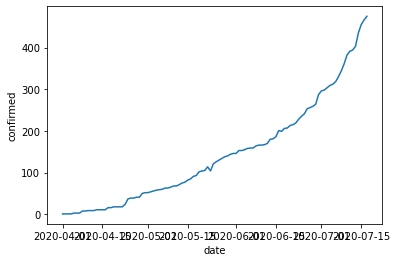

In [81]:
ax = sns.lineplot(x='date', y='confirmed', data=df_cities.loc[df_cities['city']=='Três Lagoas'])

In [82]:
df_cities['outbreak'] - df_cities['date']

TypeError: cannot subtract DatetimeArray from ndarray